# Big Data Analysis for Better Breathing: Utilizing Electronic Health Records for Asthma Insights

The World Health Organization (WHO) is concerned about the increasing prevalence of asthma and aims to predict individuals who are at risk and need to take precautions. This project seeks to develop a predictive model to classify individuals into two zones: 

1. *Red Zone*: Individuals at high risk who need to seek medical attention.
2. *Green Zone*: Individuals considered safe with no immediate need for medical concern.

First, we look through the data and find some basic inquiry.

## We explore the data and find solutions of some basic questions. 

This questions are divided into different subsections and each sections will be visualized for better understanding.

### Demographic and Health Profile
    What is the age range of the patients in the dataset?
    How many male and female patients are there?
    What is the distribution of ethnicity among the patients?
    What is the education level distribution among the patients?

### Lifestyle and Environmental Factors
    What is the average BMI of the patients?
    How many patients are smokers?
    What is the range of physical activity scores among the patients?
    How is diet quality rated on average among the patients?
    What is the average sleep quality score among the patients?
    How many patients are exposed to high levels of pollution?
    What is the average pollen exposure score for the patients?
    How many patients are exposed to dust and have a pet allergy?

### Medical History and Symptoms
    How many patients have a family history of asthma?
    How many patients have a history of allergies?
    What percentage of patients have eczema or hay fever?
    How many patients have gastroesophageal reflux?
    What are the average lung function FEV1 and FVC values among the patients?
    How many patients experience wheezing, shortness of breath, chest tightness, or coughing?
    How many patients report nighttime symptoms or exercise-induced symptoms?

### Diagnosis and Medical Care
    How many patients have been diagnosed with asthma?
    Who is the doctor in charge of the patients in this dataset?

### Importing required packages and overview the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('asthma_disease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Demographic and Health Profile

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

In [5]:
# Age range of the patients
age_range = df['Age'].min(), df['Age'].max()

# Number of male and female patients
gender_counts = df['Gender'].value_counts()

# Distribution of ethnicity
ethnicity_distribution = df['Ethnicity'].value_counts()

# Education level distribution
education_level_distribution = df['EducationLevel'].value_counts()

age_range, gender_counts, ethnicity_distribution, education_level_distribution

((5, 79),
 0    1212
 1    1180
 Name: Gender, dtype: int64,
 0    1465
 1     475
 2     229
 3     223
 Name: Ethnicity, dtype: int64,
 1    933
 2    749
 0    478
 3    232
 Name: EducationLevel, dtype: int64)

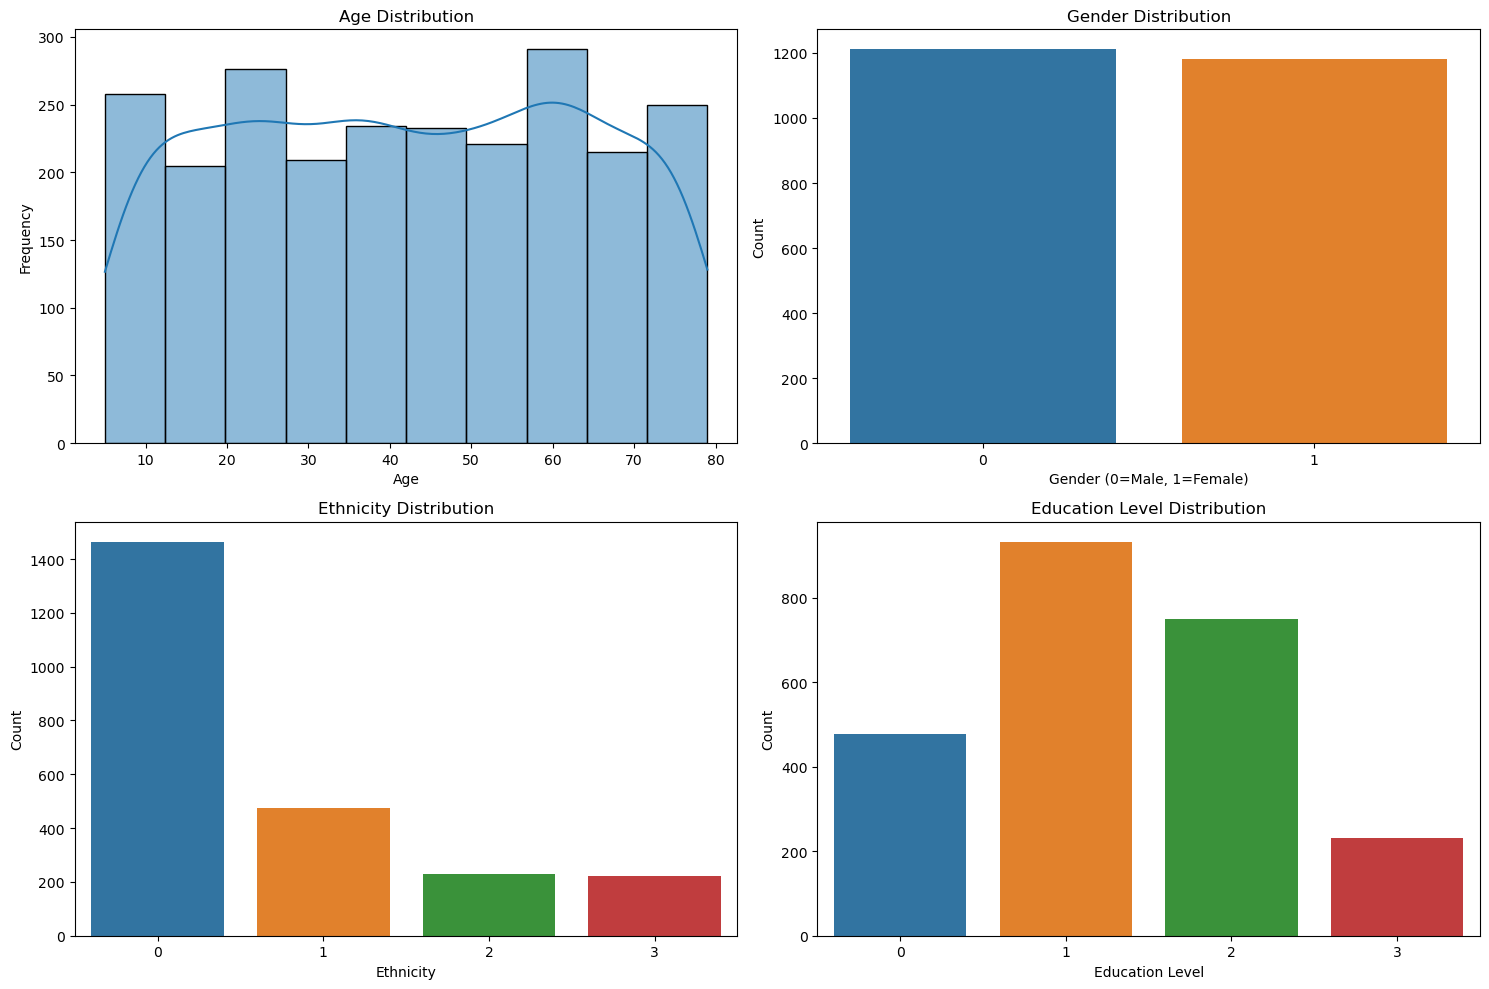

In [6]:
# Setting up the visualizations
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')

# Ethnicity Distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Education Level Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='EducationLevel', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Lifestyle and Environmental Factors

In [7]:
# Average BMI of the patients
average_bmi = df['BMI'].mean()

# Number of patients who are smokers
num_smokers = df['Smoking'].sum()

# Range of physical activity scores among the patients
physical_activity_range = df['PhysicalActivity'].min(), df['PhysicalActivity'].max()

# Average diet quality rating among the patients
average_diet_quality = df['DietQuality'].mean()

# Average sleep quality score among the patients
average_sleep_quality = df['SleepQuality'].mean()

# Number of patients exposed to high levels of pollution (assuming a threshold, e.g., 5)
high_pollution_exposure = df[df['PollutionExposure'] > 5].shape[0]

# Average pollen exposure score for the patients
average_pollen_exposure = df['PollenExposure'].mean()

# Number of patients exposed to dust and have a pet allergy
dust_and_pet_allergy = df[(df['DustExposure'] > 0) & (df['PetAllergy'] == 1)].shape[0]

In [8]:
# Output the results 
output = f"""
Average BMI of the patients: {average_bmi:.2f}
Number of patients who are smokers: {num_smokers}
Range of physical activity scores among the patients: {physical_activity_range}
Average diet quality rating among the patients: {average_diet_quality:.2f}
Average sleep quality score among the patients: {average_sleep_quality:.2f}
Number of patients exposed to high levels of pollution: {high_pollution_exposure}
Average pollen exposure score for the patients: {average_pollen_exposure:.2f}
Number of patients exposed to dust and have a pet allergy: {dust_and_pet_allergy}
"""
print(output)


Average BMI of the patients: 27.24
Number of patients who are smokers: 339
Range of physical activity scores among the patients: (0.0017403282894756, 9.995809378574393)
Average diet quality rating among the patients: 5.02
Average sleep quality score among the patients: 7.02
Number of patients exposed to high levels of pollution: 1205
Average pollen exposure score for the patients: 5.11
Number of patients exposed to dust and have a pet allergy: 397



### Medical History and Symptoms

In [9]:
# Counting patients with a family history of asthma
family_history_asthma_count = df['FamilyHistoryAsthma'].sum()

# Counting patients with a history of allergies
history_of_allergies_count = df['HistoryOfAllergies'].sum()

# Counting patients with eczema or hay fever
eczema_or_hay_fever_count = ((df['Eczema'] == 1) | (df['HayFever'] == 1)).sum()

# Calculating percentage of patients with eczema or hay fever
percentage_eczema_or_hay_fever = (eczema_or_hay_fever_count / len(df)) * 100

# Counting patients with gastroesophageal reflux
gastroesophageal_reflux_count = df['GastroesophagealReflux'].sum()

# Calculating average lung function FEV1 and FVC values
avg_lung_function_FEV1 = df['LungFunctionFEV1'].mean()
avg_lung_function_FVC = df['LungFunctionFVC'].mean()

# Counting patients experiencing wheezing, shortness of breath, chest tightness, or coughing
symptoms_count = ((df['Wheezing'] == 1) | (df['ShortnessOfBreath'] == 1) | 
                  (df['ChestTightness'] == 1) | (df['Coughing'] == 1)).sum()

# Counting patients reporting nighttime symptoms or exercise-induced symptoms
nighttime_or_exercise_count = ((df['NighttimeSymptoms'] == 1) | (df['ExerciseInduced'] == 1)).sum()

# Printing the results
print(f"Number of patients with a family history of asthma: {family_history_asthma_count}")
print(f"Number of patients with a history of allergies: {history_of_allergies_count}")
print(f"Percentage of patients with eczema or hay fever: {percentage_eczema_or_hay_fever:.2f}%")
print(f"Number of patients with gastroesophageal reflux: {gastroesophageal_reflux_count}")
print(f"Average lung function FEV1 value among patients: {avg_lung_function_FEV1:.2f}")
print(f"Average lung function FVC value among patients: {avg_lung_function_FVC:.2f}")
print(f"Number of patients experiencing wheezing, shortness of breath, chest tightness, or coughing: {symptoms_count}")
print(f"Number of patients reporting nighttime symptoms or exercise-induced symptoms: {nighttime_or_exercise_count}")

Number of patients with a family history of asthma: 720
Number of patients with a history of allergies: 955
Percentage of patients with eczema or hay fever: 39.59%
Number of patients with gastroesophageal reflux: 378
Average lung function FEV1 value among patients: 2.55
Average lung function FVC value among patients: 3.74
Number of patients experiencing wheezing, shortness of breath, chest tightness, or coughing: 2273
Number of patients reporting nighttime symptoms or exercise-induced symptoms: 2024


### Diagnosis and Medical Care


In [10]:
# Counting patients diagnosed with asthma
asthma_diagnosed_count = (df['Diagnosis'] == 1).sum()

# Finding out the doctor in charge of the patients
doctor_in_charge = df['DoctorInCharge'].unique()

# Printing the results
print(f"Number of patients diagnosed with asthma: {asthma_diagnosed_count}")
print(f"The doctor in charge of the patients: {doctor_in_charge[0]}")

Number of patients diagnosed with asthma: 124
The doctor in charge of the patients: Dr_Confid


## We visualize the data and find some relation

### Relationship between BMI and Physical Activity

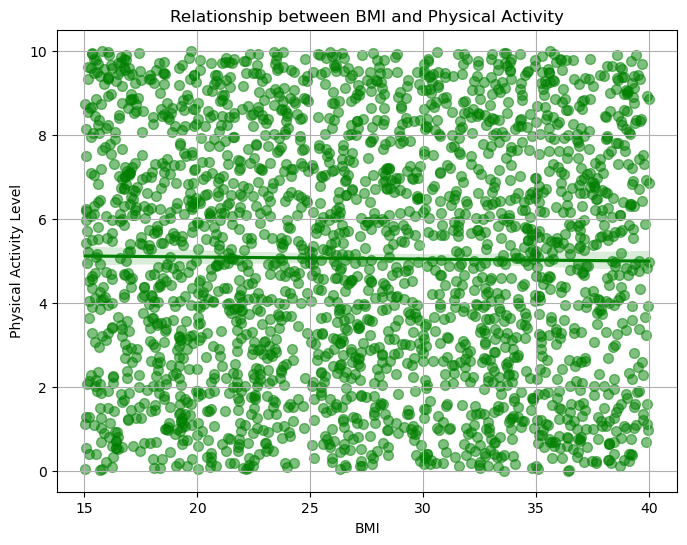

In [11]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='BMI', y='PhysicalActivity', data=df, scatter_kws={'s': 50, 'alpha': 0.5}, color='green')
plt.title('Relationship between BMI and Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Physical Activity Level')
plt.grid(True)
plt.show()

### Comparing Lung Function FEV1 and FVC

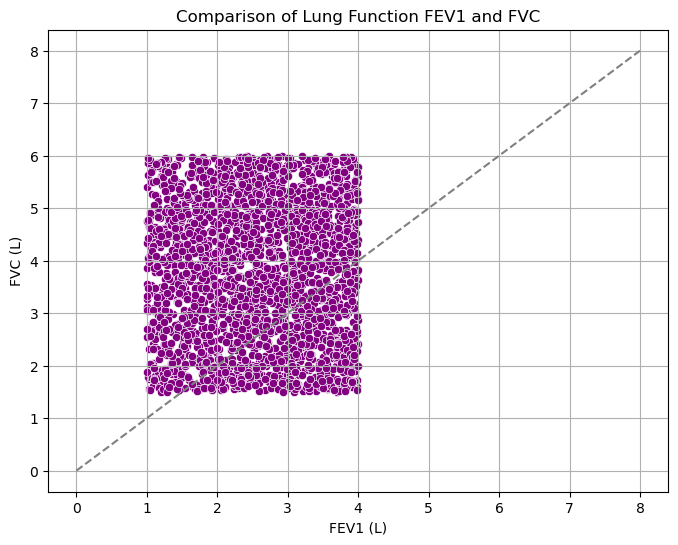

In [12]:

# Scatter plot with a line of equality (y=x)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LungFunctionFEV1', y='LungFunctionFVC', data=df, color='purple')
plt.plot([0, 8], [0, 8], '--', color='gray')  # Line of equality y=x
plt.title('Comparison of Lung Function FEV1 and FVC')
plt.xlabel('FEV1 (L)')
plt.ylabel('FVC (L)')
plt.grid(True)
plt.show()

### Proportion of Patients with Different Allergies

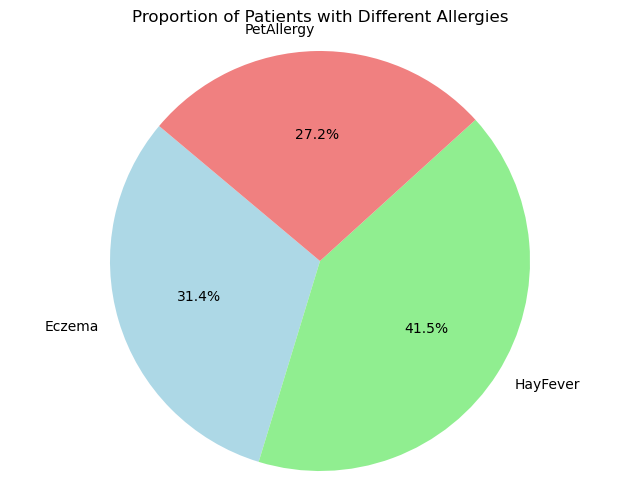

In [13]:
# Calculating counts
allergy_counts = df[['Eczema', 'HayFever', 'PetAllergy']].sum()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(allergy_counts, labels=allergy_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Patients with Different Allergies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Doctor-Patient Distribution

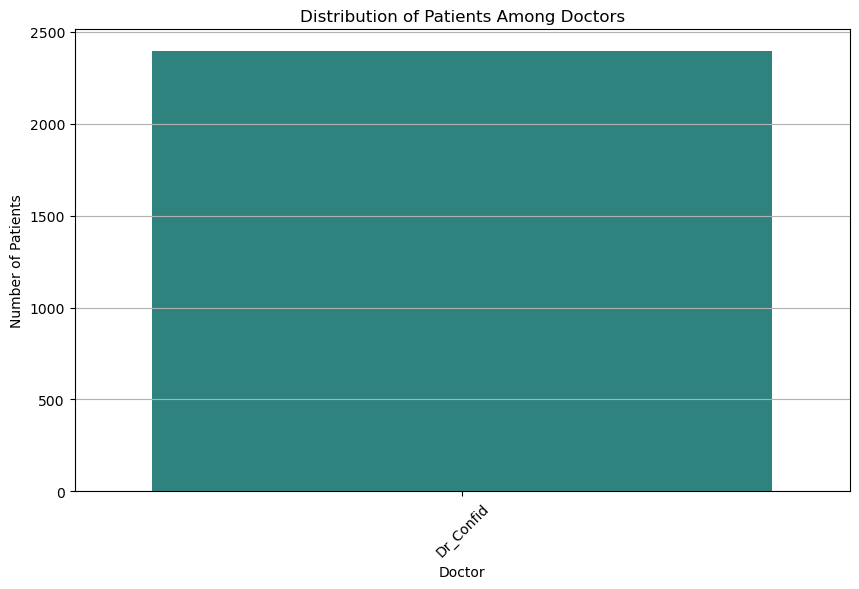

In [14]:
# Counting patients per doctor
doctor_counts = df['DoctorInCharge'].value_counts()

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=doctor_counts.index, y=doctor_counts.values, palette='viridis')
plt.title('Distribution of Patients Among Doctors')
plt.xlabel('Doctor')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

### Distribution of BMI by Gender

Displays the distribution of BMI by gender using a box plot, providing insights into the spread and central tendency of BMI values across different genders.

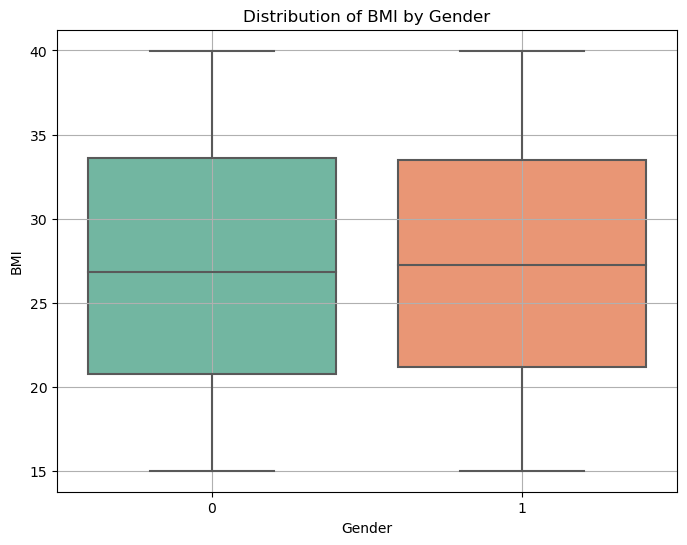

In [15]:
# Box plot of BMI by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=df, palette='Set2')
plt.title('Distribution of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

### Correlation Heatmap of Health Indicators

Visualizes the correlations between various health indicators (BMI, Physical Activity, Diet Quality, etc.) using a heatmap, highlighting relationships between variables.

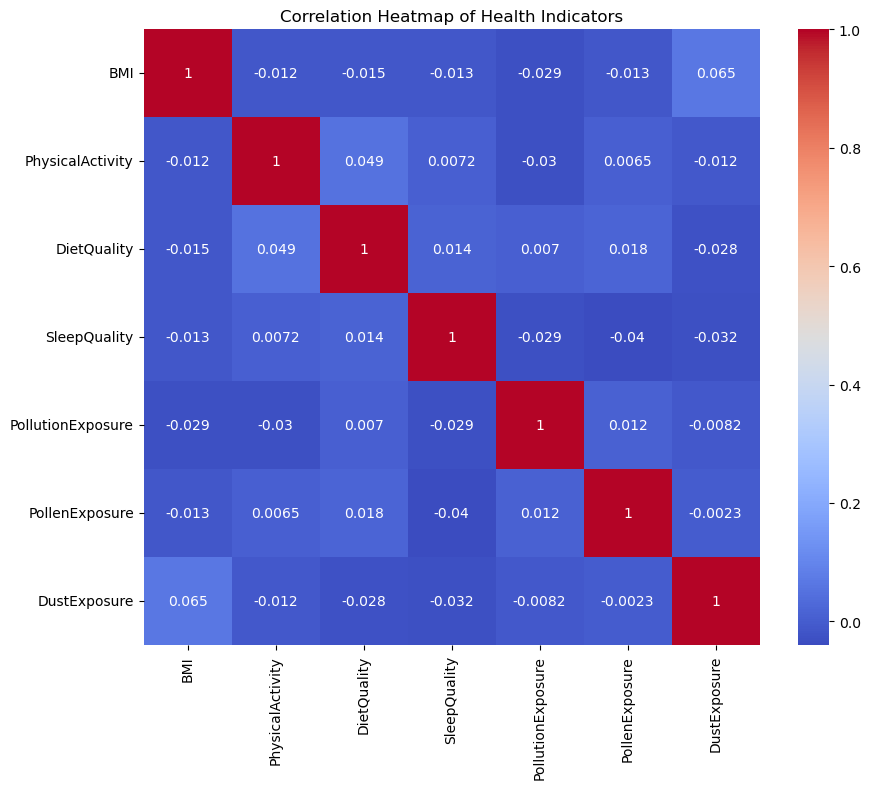

In [16]:
# Selecting relevant columns for correlation
health_indicators = df[['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
                        'PollutionExposure', 'PollenExposure', 'DustExposure']]

# Calculating correlation matrix
correlation_matrix = health_indicators.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Health Indicators')
plt.show()

### Line Plot of Lung Function over Age

Depicts how lung function (FEV1 and FVC) changes with patient age using a line plot, showing trends and variations in lung function metrics over the age range.

C:\Users\ashik\AppData\Local\Temp\ipykernel_19340\3875603601.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='LungFunctionFEV1', data=df, ci=None, label='FEV1')
C:\Users\ashik\AppData\Local\Temp\ipykernel_19340\3875603601.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='LungFunctionFVC', data=df, ci=None, label='FVC')


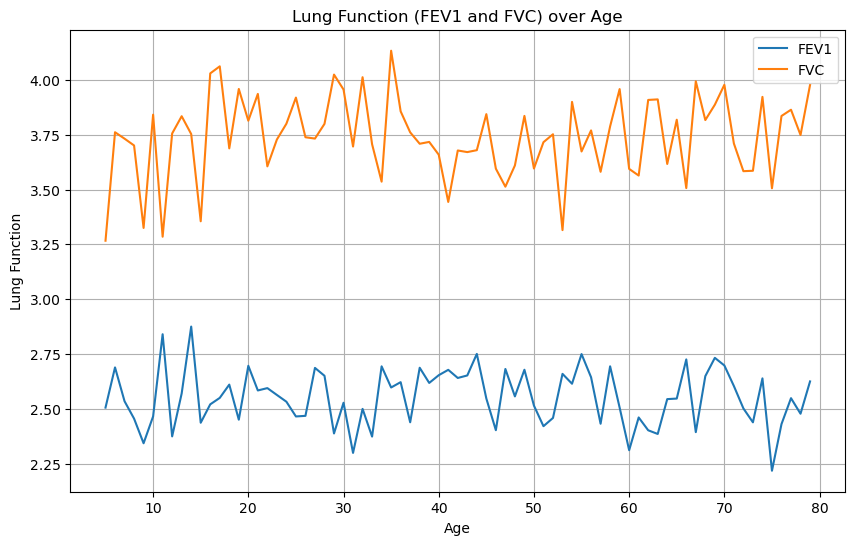

In [17]:
# Line plot of lung function over age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='LungFunctionFEV1', data=df, ci=None, label='FEV1')
sns.lineplot(x='Age', y='LungFunctionFVC', data=df, ci=None, label='FVC')
plt.title('Lung Function (FEV1 and FVC) over Age')
plt.xlabel('Age')
plt.ylabel('Lung Function')
plt.legend()
plt.grid(True)
plt.show()

## Risk Classification Criteria Based on BMI and Respiratory Symptoms

#### Criteria for Red and Green Zones:

Red Zone: BMI > 30 and at least one of (Wheezing, Shortness of Breath, Chest Tightness, Coughing).

Green Zone: BMI < 25 and none of (Wheezing, Shortness of Breath, Chest Tightness, Coughing).

In [18]:
# Define criteria for Red Zone (hypothetical example)
def is_red_zone(row):
    # Example criteria: Individuals with high BMI and reported symptoms
    if row['BMI'] > 30 and (row['Wheezing'] == 1 or row['ShortnessOfBreath'] == 1 or row['ChestTightness'] == 1 or row['Coughing'] == 1):
        return True
    else:
        return False

# Define criteria for Green Zone (hypothetical example)
def is_green_zone(row):
    # Example criteria: Individuals with low BMI and no reported symptoms
    if row['BMI'] < 25 and row['Wheezing'] == 0 and row['ShortnessOfBreath'] == 0 and row['ChestTightness'] == 0 and row['Coughing'] == 0:
        return True
    else:
        return False

# Apply the criteria to classify individuals into Red Zone and Green Zone
df['RedZone'] = df.apply(is_red_zone, axis=1)
df['GreenZone'] = df.apply(is_green_zone, axis=1)

# Counting individuals in each zone
red_zone_count = df['RedZone'].sum()
green_zone_count = df['GreenZone'].sum()



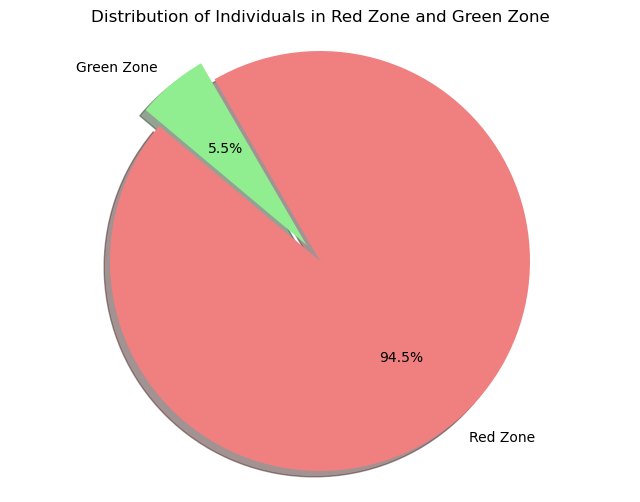

In [19]:
# Plotting the results
labels = ['Red Zone', 'Green Zone']
sizes = [red_zone_count, green_zone_count]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Individuals in Red Zone and Green Zone')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The analysis shows that a significant portion of individuals fell into the Green Zone, indicating they were at lower risk with no immediate medical concern based on BMI and absence of respiratory symptoms. Conversely, individuals in the Red Zone highlighted potential high-risk cases requiring further medical attention due to elevated BMI and presence of respiratory symptoms.

The majority of individuals (94.5%) fall into the Red Zone. This indicates that these individuals have a BMI greater than 30 and/or experience at least one respiratory symptom such as wheezing, shortness of breath, chest tightness, or coughing. Individuals in this zone are considered at higher risk and may require closer monitoring or medical intervention.